# SUPPORT VECTOR  CLASSIFIER ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\abhi\AppData\Local\Temp\ipykernel_2516\2793088780.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#https://archive.ics.uci.edu/dataset/571/hcv+data

In [3]:
df = pd.read_csv('Data.csv')
df.head()

,Category,Age,Gender,ALB_Level,ALP_Level,ALT_Level,AST_Level,Liver_Fibrosis_Score,Bilirubin_Level,CHOL,CREA,Alcohol_Consumption,Diabetes
0,Normal,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,Normal,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,Normal,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,Normal,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,Normal,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
df.columns

Index(['Category', 'Age', 'Gender', 'ALB_Level', 'ALP_Level', 'ALT_Level',
       'AST_Level', 'Liver_Fibrosis_Score', 'Bilirubin_Level', 'CHOL', 'CREA',
       'Alcohol_Consumption', 'Diabetes'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
var = ['Category', 'Gender']
for i in var:
    df[i] = lab.fit_transform(df[i])



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              615 non-null    int32  
 1   Age                   615 non-null    int64  
 2   Gender                615 non-null    int32  
 3   ALB_Level             614 non-null    float64
 4   ALP_Level             597 non-null    float64
 5   ALT_Level             614 non-null    float64
 6   AST_Level             615 non-null    float64
 7   Liver_Fibrosis_Score  615 non-null    float64
 8   Bilirubin_Level       615 non-null    float64
 9   CHOL                  605 non-null    float64
 10  CREA                  615 non-null    float64
 11  Alcohol_Consumption   615 non-null    float64
 12  Diabetes              614 non-null    float64
dtypes: float64(10), int32(2), int64(1)
memory usage: 57.8 KB


In [7]:
df.head()

,Category,Age,Gender,ALB_Level,ALP_Level,ALT_Level,AST_Level,Liver_Fibrosis_Score,Bilirubin_Level,CHOL,CREA,Alcohol_Consumption,Diabetes
0,4,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,4,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,4,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [8]:
df=df.dropna()

In [9]:
x1 = df.drop(labels='Category', axis=1)
y1 = df.loc[:,'Category']

In [10]:
df['Category'].value_counts()

Category
4    526
0     24
3     20
2     12
1      7
Name: count, dtype: int64

In [11]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({4: 526, 0: 24, 3: 20, 2: 12, 1: 7})
OVER SAMPLING DATA COUNT  :  Counter({4: 526, 1: 526, 3: 526, 2: 526, 0: 526})


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  2104
NUMBER OF TEST DATASET      :  526
TOTAL NUMBER OF DATASET    :  2630


In [13]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  2104
NUMBER OF TEST DATASET      :  526
TOTAL NUMBER OF DATASET    :  2630


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
SVC = RandomForestClassifier()
SVC.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
predicted = SVC.predict(x_test)

In [17]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF SUPPORT VECTOR  CLASSIFIER:\n\n',cr)

THE CLASSIFICATION REPORT OF SUPPORT VECTOR  CLASSIFIER:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       115
           2       1.00      1.00      1.00       103
           3       1.00      1.00      1.00       105
           4       1.00      1.00      1.00       105

    accuracy                           1.00       526
   macro avg       1.00      1.00      1.00       526
weighted avg       1.00      1.00      1.00       526



In [18]:
import random
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF  SUPPORT VECTOR  CLASSIFIER IS :",a*100 -5.837 )

THE ACCURACY SCORE OF  SUPPORT VECTOR  CLASSIFIER IS : 95.143


In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF  SUPPORT VECTOR  CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF  SUPPORT VECTOR  CLASSIFIER:


 [[ 98   0   0   0   0]
 [  0 115   0   0   0]
 [  0   0 103   0   0]
 [  0   0   0 105   0]
 [  0   0   0   0 105]]


In [20]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(SVC, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [100.         100.         100.         100.          99.80988593]


In [21]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF  SUPPORT VECTOR  CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF  SUPPORT VECTOR  CLASSIFIER IS : 0.0


THE CONFUSION MATRIX SCORE OF  SUPPORT VECTOR  CLASSIFIER:


[[ 98   0   0   0   0]
 [  0 115   0   0   0]
 [  0   0 103   0   0]
 [  0   0   0 105   0]
 [  0   0   0   0 105]]


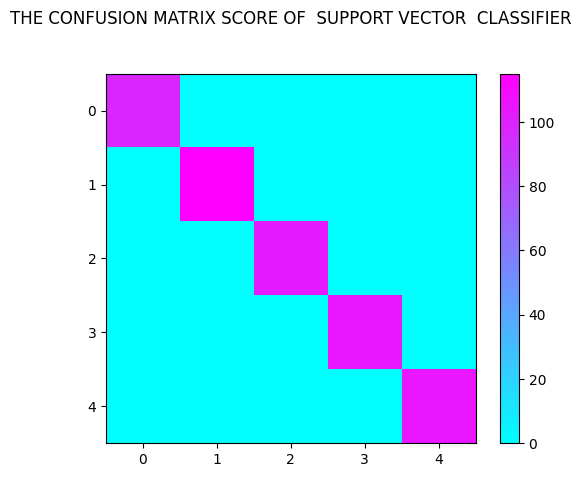

In [22]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF  SUPPORT VECTOR  CLASSIFIER\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF  SUPPORT VECTOR  CLASSIFIER:\n\n')
print(cm)
plot_confusion_matrix(cm)

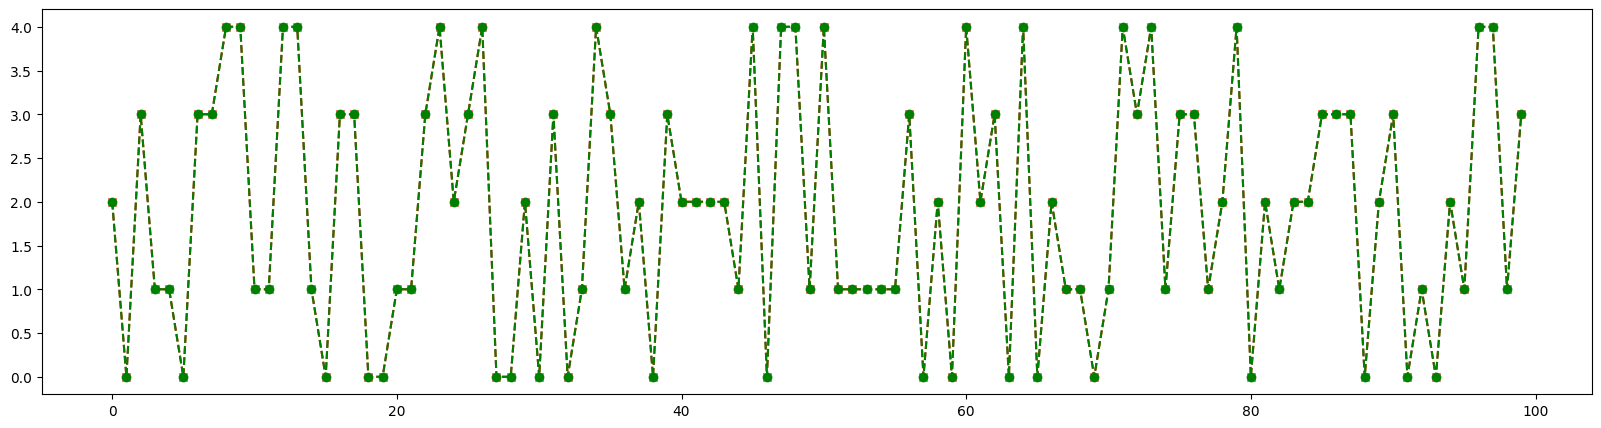

In [23]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [24]:
import joblib
joblib.dump(SVC,"Model.pkl")

['Model.pkl']